# CHAPTER 01 - Introduction to Time Series
---

## 0.0. Imports

In [38]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib           import pyplot as plt
from IPython.core.display import HTML
from IPython.display      import Image

%matplotlib inline

## 0.1. Helper Functions

In [39]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [41]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 1.0. Monthly C02 Concentrations

In [10]:
data = pd.read_csv( '../../data/Monthly_CO2_Concentrations.csv', converters = {'Year': np.int32, 'Month': np.int32} )
data = data[['CO2', 'Year', 'Month']]
data['Date'] = data['Year'].astype( str ) + '-' + data['Month'].astype( str )

FileNotFoundError: [Errno 2] File b'../../data/Monthly_CO2_Concentrations.csv' does not exist: b'../../data/Monthly_CO2_Concentrations.csv'

In [11]:
data.head()

NameError: name 'data' is not defined

In [12]:
# remove all columns having missing values
data = data.loc[ (~pd.isnull( data['CO2'] ) ) & (~pd.isnull( data['Year'] ) ) & (~pd.isnull( data['Month'] ) ) ]
data = data.sort_values( ['Year', 'Month'] )

NameError: name 'data' is not defined

In [13]:
data.head()

NameError: name 'data' is not defined

In [14]:
plt.figure( figsize=(5.5, 5.5) )
data['CO2'].plot( color='b' )
plt.title( 'Monthly CO2 concentrations' )
plt.xlabel( 'Time' )
plt.ylabel( 'CO2 concentration' )
plt.xticks( rotation=30 );

NameError: name 'data' is not defined

<Figure size 396x396 with 0 Axes>

## 2.0. DJIA  

In [15]:
djia_df = pd.read_excel( '../../data/DJIA_Jan2016_Dec2016.xlsx' )
djia_df.head() 

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [16]:
g = sns.tsplot( djia_df['Close'] )
g.set_title( 'Dow Jones Industrial Average between Jan 2016 - Dec 2016' )
g.set_xlabel( 'Time' )
g.set_ylabel( 'Closing Value' )

NameError: name 'djia_df' is not defined

In [17]:
lag = np.arange( 0, 31 )
djia_acf = []
for l in lag:
    djia_acf.append( djia_df['Close'].autocorr(l) )

NameError: name 'djia_df' is not defined

In [18]:
g = sns.pointplot( x=lag, y=djia_acf, markers='.' )
g.set_title( 'Autocorrelation function of DJIA' );
g.set_xlabel( 'Lag in terms of number of trading days' );
g.set_ylabel( 'Autocorrelation function' );
g.set_xticklabels( lag, rotation=90 );

ValueError: Grouper and axis must be same length

# CHAPTER 02 - Understanding Time Series Data
---

In [19]:
import os
import pandas as pd
import numpy  as np

from matplotlib import pyplot as plt

In [20]:
df = pd.read_csv( '../data/chemical-concentration-readings.csv' ) 

FileNotFoundError: [Errno 2] File b'../data/chemical-concentration-readings.csv' does not exist: b'../data/chemical-concentration-readings.csv'

In [21]:
print( 'Shape of the dataset:', df.shape )
df.head( 10 )

NameError: name 'df' is not defined

In [22]:
datetime_rowid = df['Timestamp'].map( lambda t: pd.to_datetime( t, format='%Y-%m-%d %H:%M:%S' ) )
df.index = datetime_rowid
df.head( 10 )

NameError: name 'df' is not defined

In [23]:
daily = df['Chemical conc.'].resample( 'D' )
daily_mean = daily.mean()

NameError: name 'df' is not defined

NameError: name 'df' is not defined

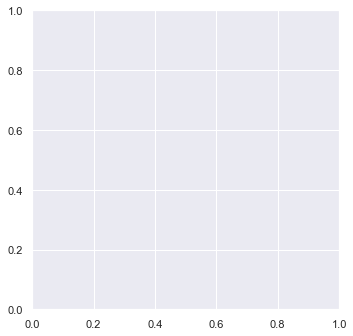

In [24]:
fig = plt.figure( figsize=(5.5, 5.5) )
ax = fig.add_subplot( 1, 1, 1 )
df['Chemical conc.'].plot( ax=ax, color='b' )
daily_mean.plot( ax=ax, color='r' )

# CHAPTER 04 - Auto-Regressive Models
---

In [8]:
import numpy as np
import pandas as pd
import statsmodels.tsa.api as smtsa

from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [9]:
def plotds( xt, nlag=30, fig_size=(12, 10) ):
    if not isinstance( xt, pd.Series ):
        xt = pd.Series( xt )
        
    fig_plt = plt.figure( figsize=fig_size )
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid( layout, (0, 0), colspan=2 )
    ax_acf = plt.subplot2grid( layout, (1, 0) )
    ax_pacf = plt.subplot2grid( layout, (1, 1) )
    
    # Plot graphs
    xt.plot( ax=ax_xt )
    ax_xt.set_title( 'Time Series' )
    plot_acf( xt, lags=50, ax=ax_acf )
    plot_pacf( xt, lags=50, ax=ax_pacf )
    plt.tight_layout()
    
    return None

## 4.1. Auto-regressive models

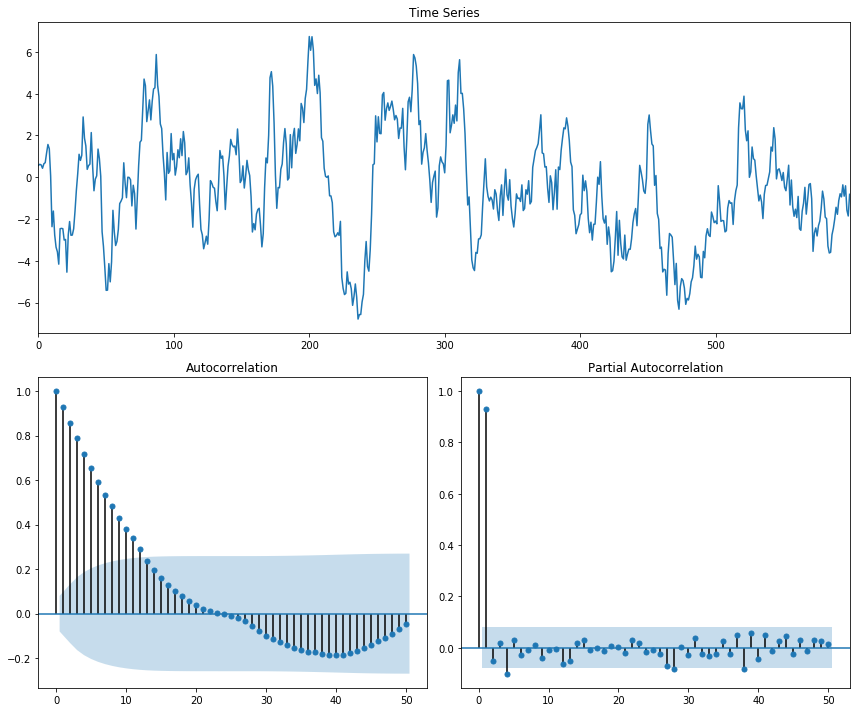

In [10]:
# Number o samples
n = 600

# Generate AR(1) dataset
ar = np.r_[1, -0.95]
ma = np.r_[1, 0]

ar1_data = smtsa.arma_generate_sample( ar=ar, ma=ma, nsample=n )
plotds( ar1_data )

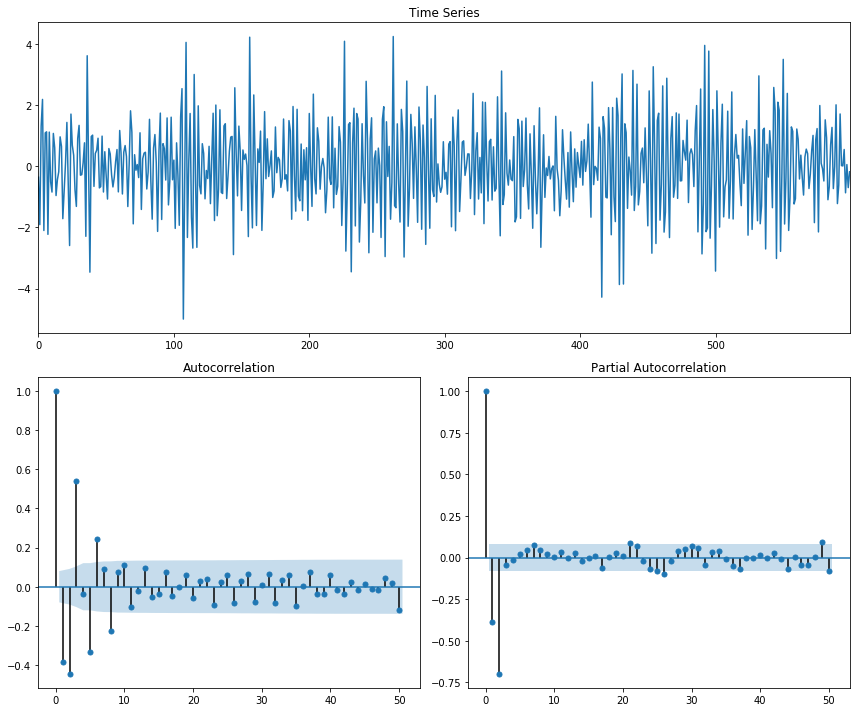

In [11]:
# Generate AR(2) dataset
n = 600
ar = np.r_[1, 0.6, 0.7]
ma = np.r_[1, 0]

ar2_data = smtsa.arma_generate_sample( ar=ar, ma=ma, nsample=n )
plotds( ar2_data )

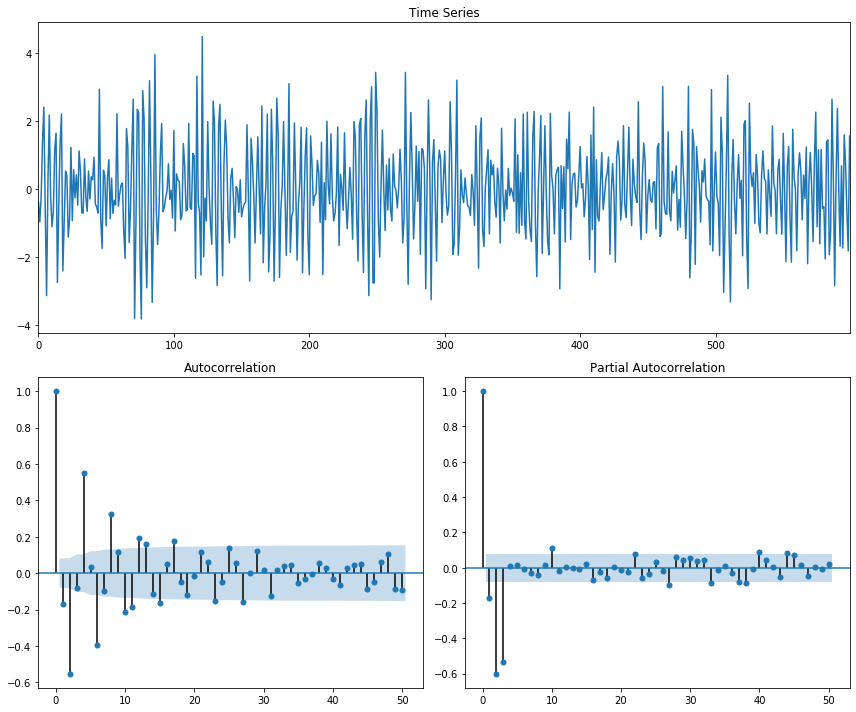

In [12]:
# Generate AR(3) dataset
ar = np.r_[1, 0.6, 0.7, 0.5]
ma = np.r_[1, 0]

ar3_data = smtsa.arma_generate_sample( ar=ar, ma=ma, nsample=n )
plotds( ar3_data )

In [13]:
# Build AR(1) model
ar1model = smtsa.ARMA( ar1_data.tolist(), order=(1, 0) )
ar1 = ar1model.fit( maxlag=30, method='mle', trend='nc' )
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 0)   Log Likelihood                -826.860
Method:                           mle   S.D. of innovations              0.958
Date:                Wed, 27 Nov 2019   AIC                           1657.720
Time:                        05:50:48   BIC                           1666.514
Sample:                             0   HQIC                          1661.143
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9304      0.015     63.495      0.000       0.902       0.959
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0748           +0.0000j            1.0748            0.0000
-----------------------------------------------------------------------------
"""

In [14]:
# Build AR(3) model
ar3model = smtsa.ARMA( ar3_data.tolist(), order=(3, 0) )
ar3 = ar3model.fit( maxlag=30, method='mle', trend='nc' )
ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(3, 0)   Log Likelihood                -817.269
Method:                           mle   S.D. of innovations              0.943
Date:                Wed, 27 Nov 2019   AIC                           1642.539
Time:                        05:50:48   BIC                           1660.126
Sample:                             0   HQIC                          1649.385
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.5870      0.035    -16.972      0.000      -0.655      -0.519
ar.L2.y       -0.7415      0.029    -25.445      0.000      -0.799      -0.684
ar.L3.y       -0.5304      0.035    -15.361      0.000      -0.598      -0.463
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0504           -1.1204j            1.1216           -0.2428
AR.2            0.0504           +1.1204j            1.1216            0.2428
AR.3           -1.4988           -0.0000j            1.4988           -0.5000
-----------------------------------------------------------------------------
"""

## 4.2. Moving Average Models

In [15]:
# MA models use dependency between residual errors to forecast values in the next time period.
# The model helps you adjust for any unpredictable events sucha as catastrophic events leading to a share market crash leasding to share price falling,
#     which will happen over time and is captured as moving average process.

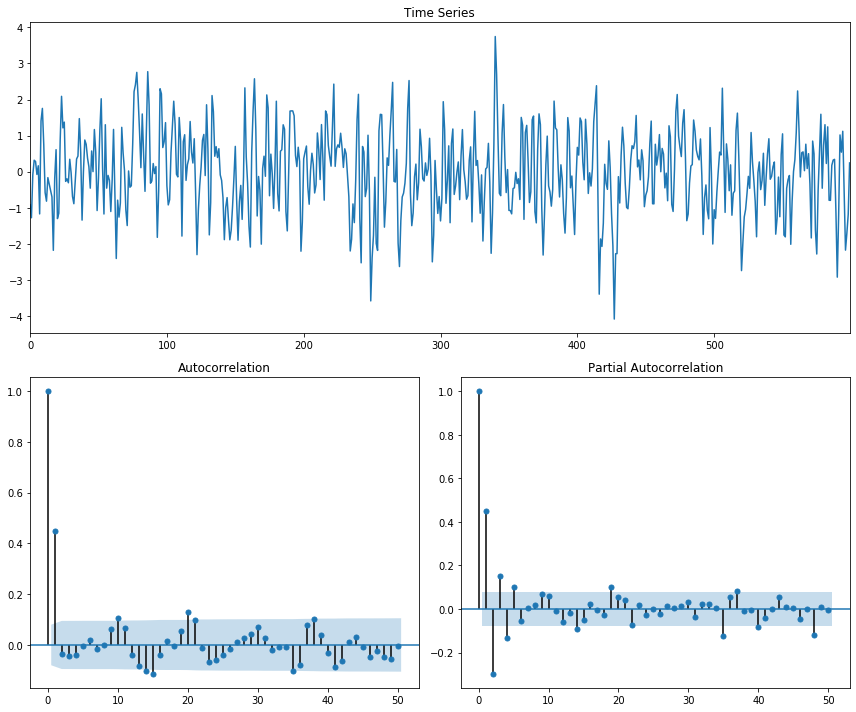

In [16]:
# Number of samples
n = 600

# Generate MA(1)
ar = np.r_[1, -0]
ma = np.r_[1, 0.7]
ma1_data = smtsa.arma_generate_sample( ar=ar, ma=ma, nsample=n )
plotds( ma1_data )

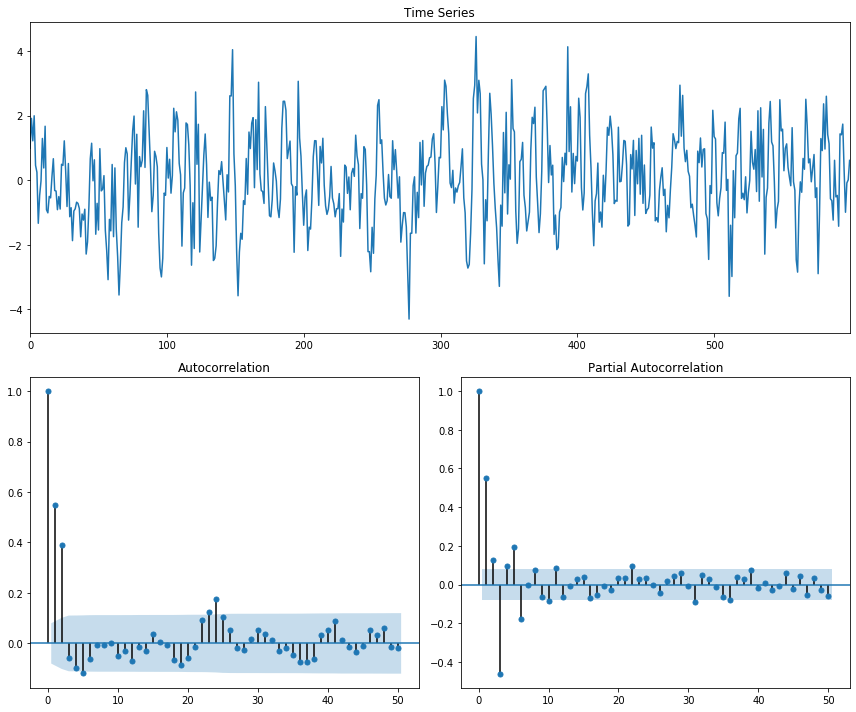

In [17]:
# Generate MA(2)
ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7]
ma2_data = smtsa.arma_generate_sample( ar=ar, ma=ma, nsample=n )
plotds( ma2_data )

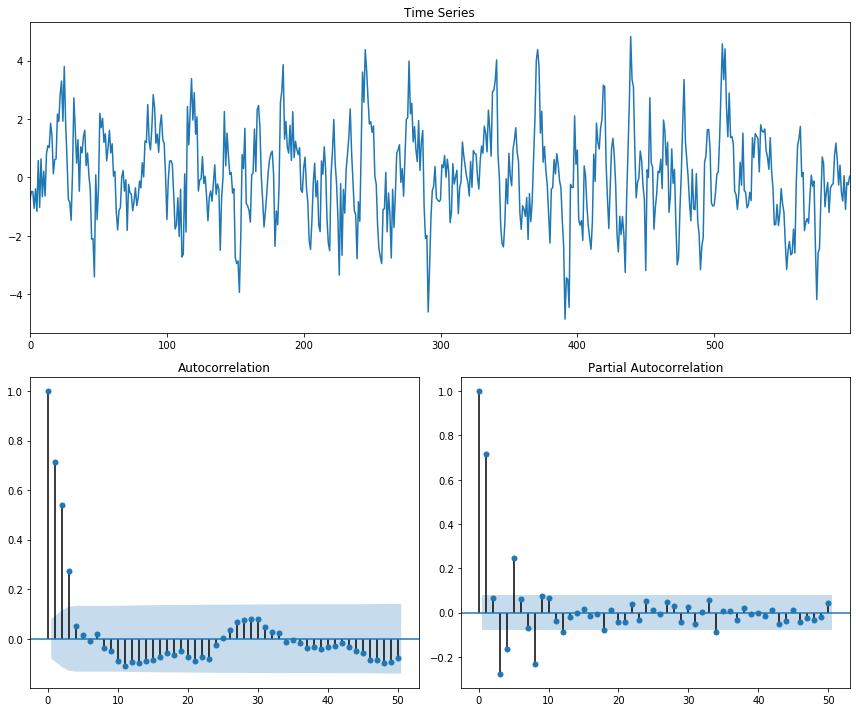

In [18]:
# Generate MA(3)
ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7, 0.5]
ma3_data = smtsa.arma_generate_sample( ar=ar, ma=ma, nsample=n )
plotds( ma3_data )

In [19]:
# Build MA(1) model
ma1 = smtsa.ARMA( ma1_data.tolist(), order=(0, 1) ).fit( maxlag=30, method='mle', trend='nc' )
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 1)   Log Likelihood                -817.114
Method:                           mle   S.D. of innovations              0.944
Date:                Wed, 27 Nov 2019   AIC                           1638.227
Time:                        05:50:56   BIC                           1647.021
Sample:                             0   HQIC                          1641.650
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.6733      0.030     22.303      0.000       0.614       0.732
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4852           +0.0000j            1.4852            0.5000
-----------------------------------------------------------------------------
"""

In [20]:
# Build MA(3) model
ma3 = smtsa.ARMA( ma3_data.tolist(), order=(0, 3) ).fit( maxlag=30, method='mle', trend='nc' )
ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 3)   Log Likelihood                -853.642
Method:                           mle   S.D. of innovations              1.002
Date:                Wed, 27 Nov 2019   AIC                           1715.283
Time:                        05:50:56   BIC                           1732.871
Sample:                             0   HQIC                          1722.130
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.6110      0.037     16.467      0.000       0.538       0.684
ma.L2.y        0.7075      0.029     24.255      0.000       0.650       0.765
ma.L3.y        0.5102      0.036     14.075      0.000       0.439       0.581
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.0444           -1.1517j            1.1525           -0.2439
MA.2            0.0444           +1.1517j            1.1525            0.2439
MA.3           -1.4754           -0.0000j            1.4754           -0.5000
-----------------------------------------------------------------------------
"""

## 4.3. Building datasets with ARMA

In [23]:
# AR(q) regresses on its own lagged terms.
# - It tends to capture the mean reversion effect 
# MA(q) builds a function of error terms of the past.
# - It tends to capture the shock effect in error, which are normal or unpredictoed

# ARMA(p,q) = AR(q) + MA(q)

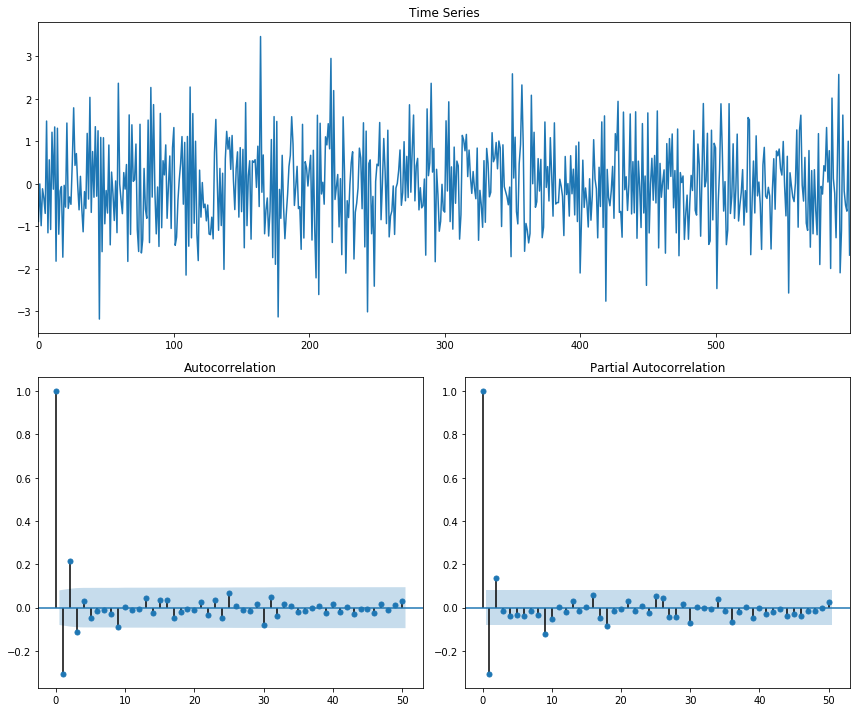

In [24]:
# Number of samples
n = 600

# Generate AR(1) dataset
ar = np.r_[1, 0.6]
ma = np.r_[1, 0.3]

ar1ma1_data = smtsa.arma_generate_sample( ar=ar, ma=ma, nsample=n )
plotds( ar1ma1_data )

In [25]:
# Build AR(1) model
ar1ma1 = smtsa.ARMA( ar1ma1_data.tolist(), order=(1, 1) ).fit( maxlag=30, method='mle', trend='nc' )
ar1ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 1)   Log Likelihood                -838.483
Method:                           mle   S.D. of innovations              0.979
Date:                Wed, 27 Nov 2019   AIC                           1682.967
Time:                        06:06:29   BIC                           1696.157
Sample:                             0   HQIC                          1688.102
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.6225      0.082     -7.585      0.000      -0.783      -0.462
ma.L1.y        0.3493      0.096      3.621      0.000       0.160       0.538
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6065           +0.0000j            1.6065            0.5000
MA.1           -2.8626           +0.0000j            2.8626            0.5000
-----------------------------------------------------------------------------
"""

In [26]:
# Optimize ARMA parameters
aicVal = []
for ari in range( 1, 3 ):
    for maj in range( 1, 3 ):
        arma_obj = smtsa.ARMA( ar1ma1_data.tolist(), order=(ari, maj) ).fit( maxlag=30, method='mle', trend='nc' )
        aicVal.append( [ari, maj, arma_obj.aic] )

In [30]:
pd.DataFrame( aicVal, columns=['AR', 'MA', 'AIC'] )

,AR,MA,AIC
0,1,1,1682.966652
1,1,2,1683.212343
2,2,1,1683.482236
3,2,2,1685.183652


### 4.3.1. IBM Stock Prices

In [45]:
# Load modules
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Load Dataset
ibm_df = pd.read_csv( '../data/ibm_common_stock_closing_prices.csv' )

# Rename the second column
ibm_df.rename( columns={'IBM common stock closing prices': 'Close_Price'}, inplace=True )

In [46]:
ibm_df.head()

,Date,Close_Price
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


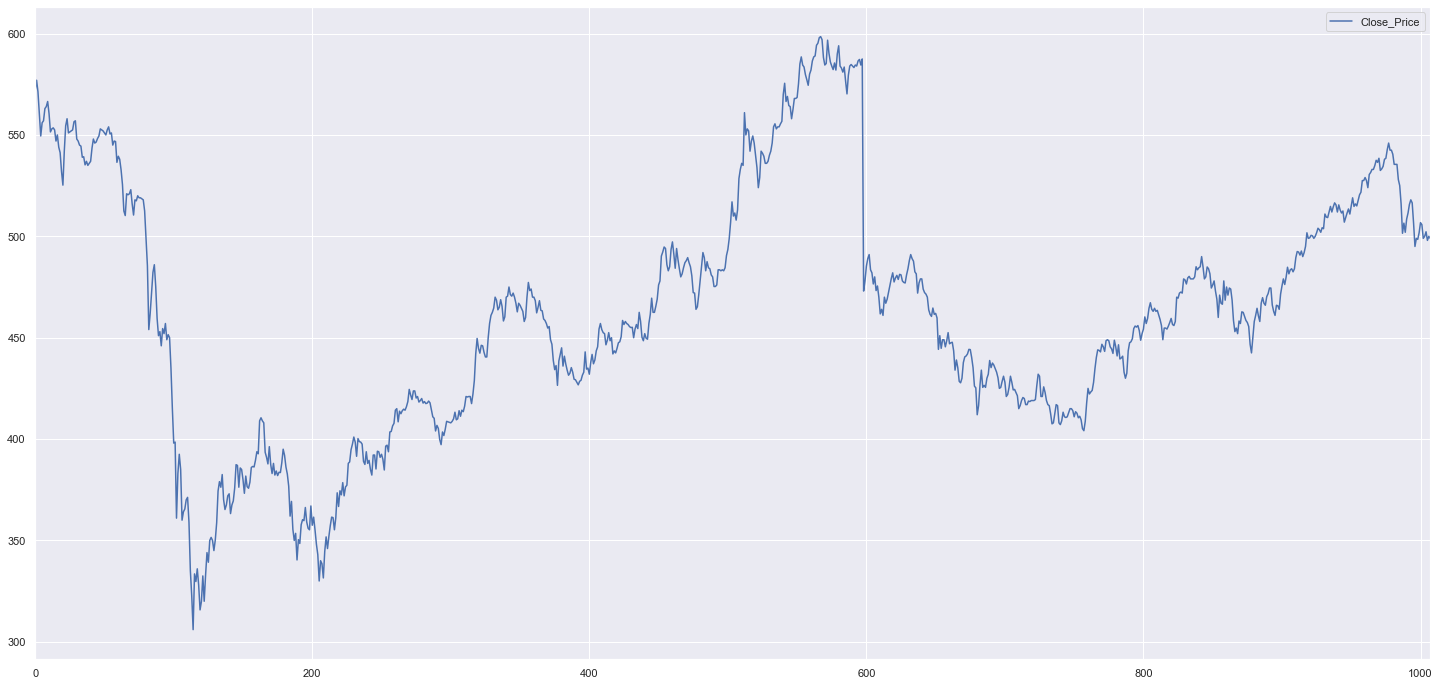

In [47]:
ibm_df.plot()

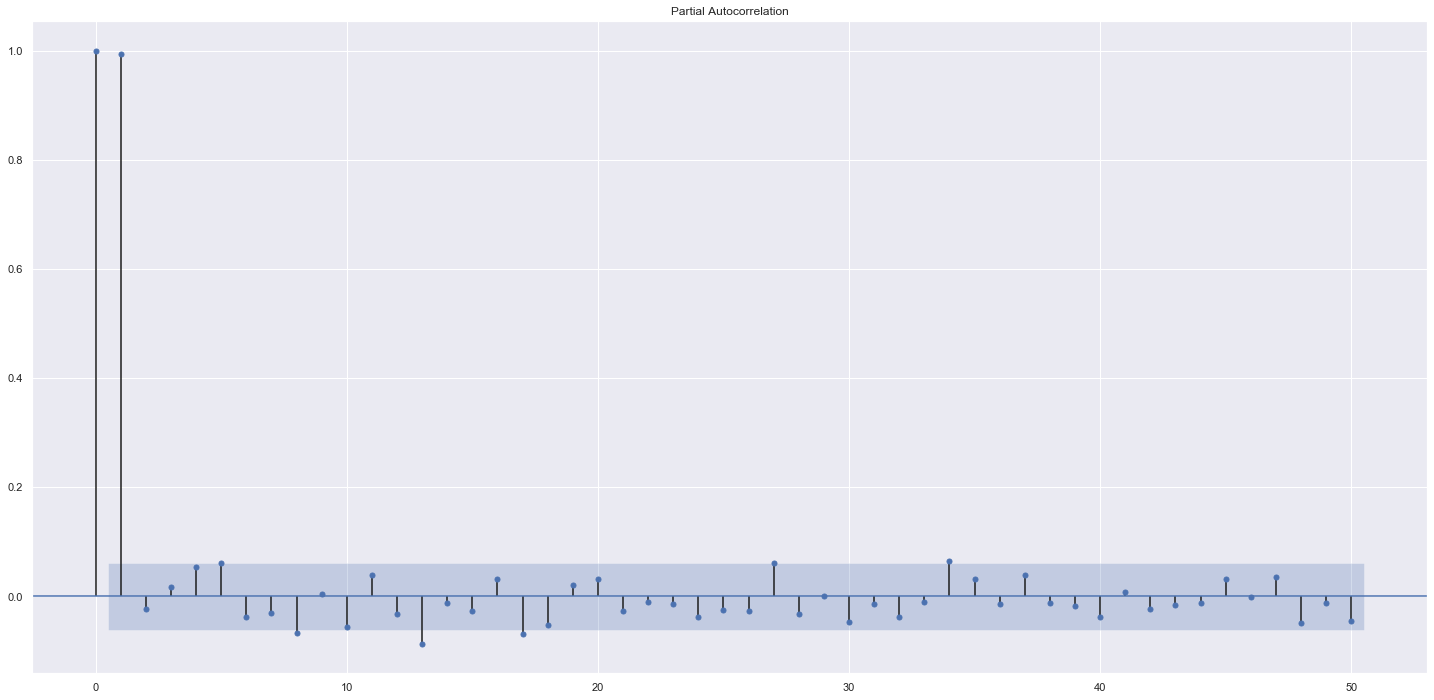

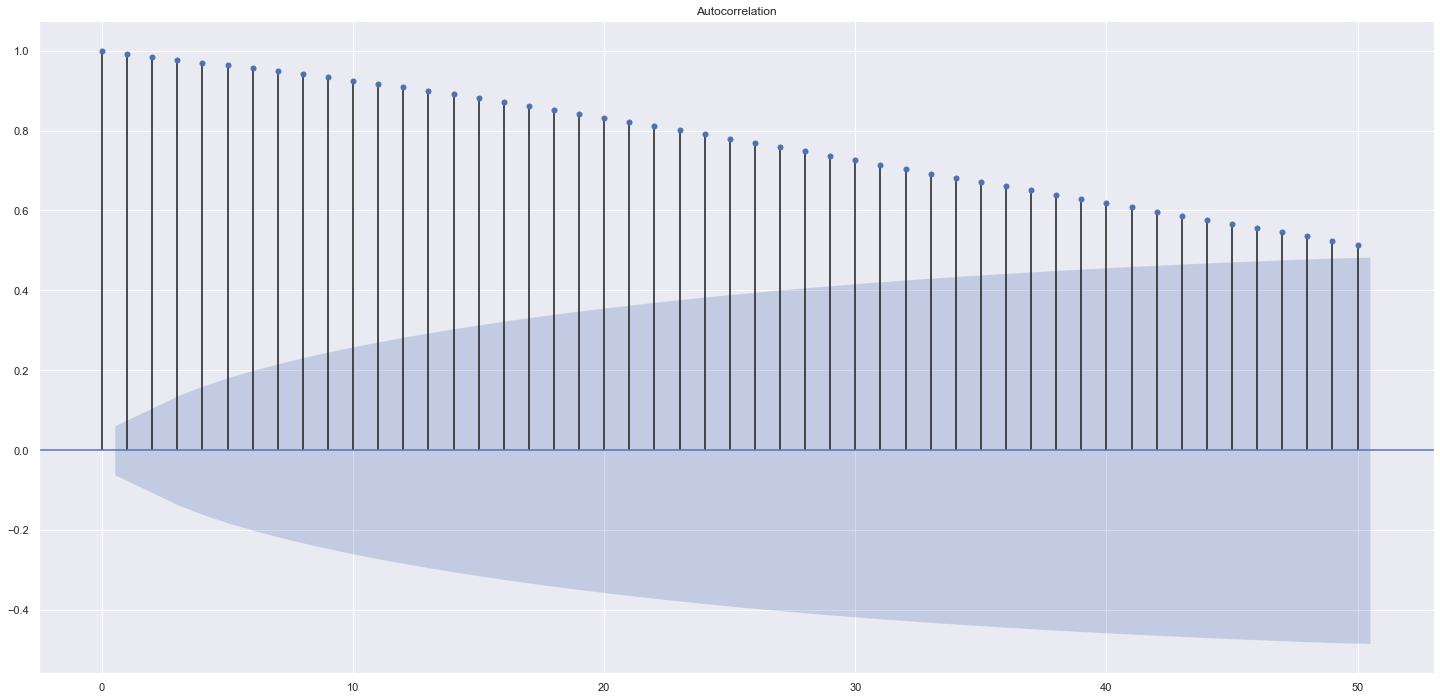

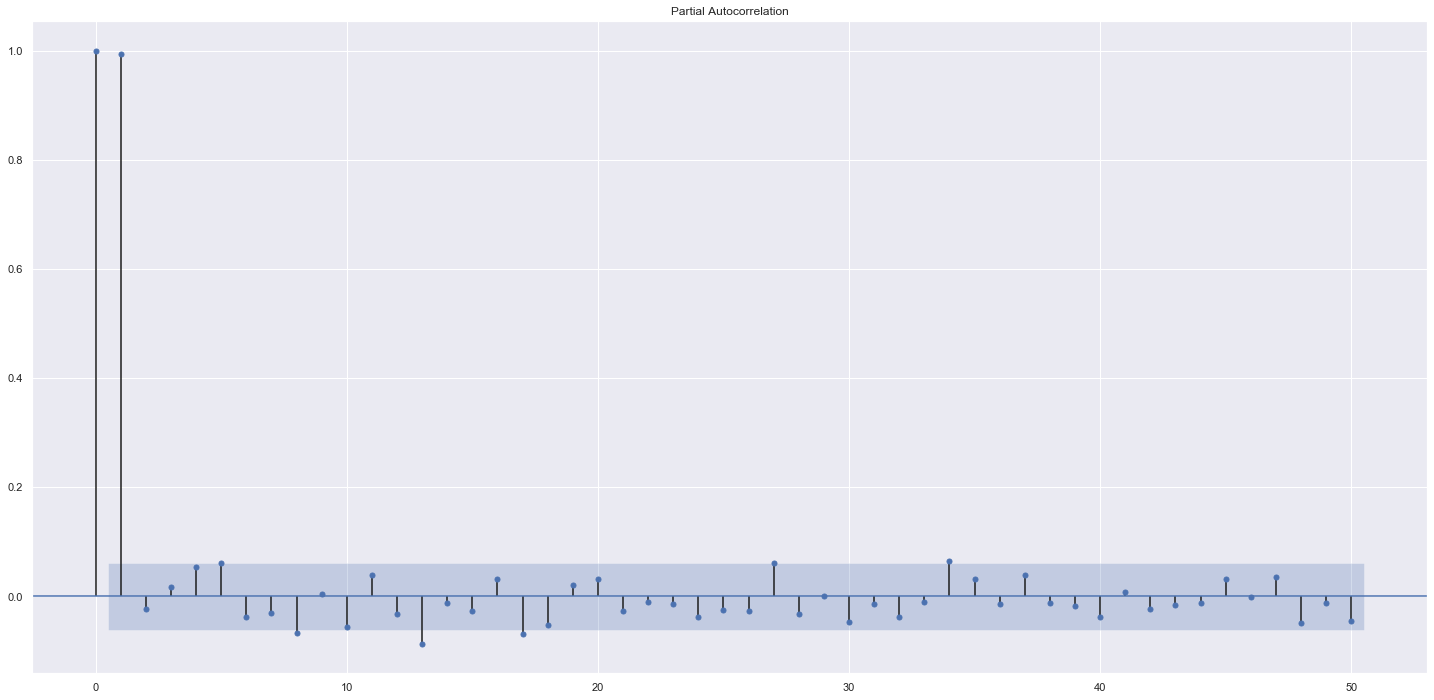

In [48]:
# Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ibm_df['residual'] = ibm_df['Close_Price'] - ibm_df['Close_Price'].mean()
ibm_df = ibm_df.dropna()

plot_acf( ibm_df.residual, lags=50 )
plot_pacf( ibm_df.residual, lags=50 )

In [59]:
156+135

291

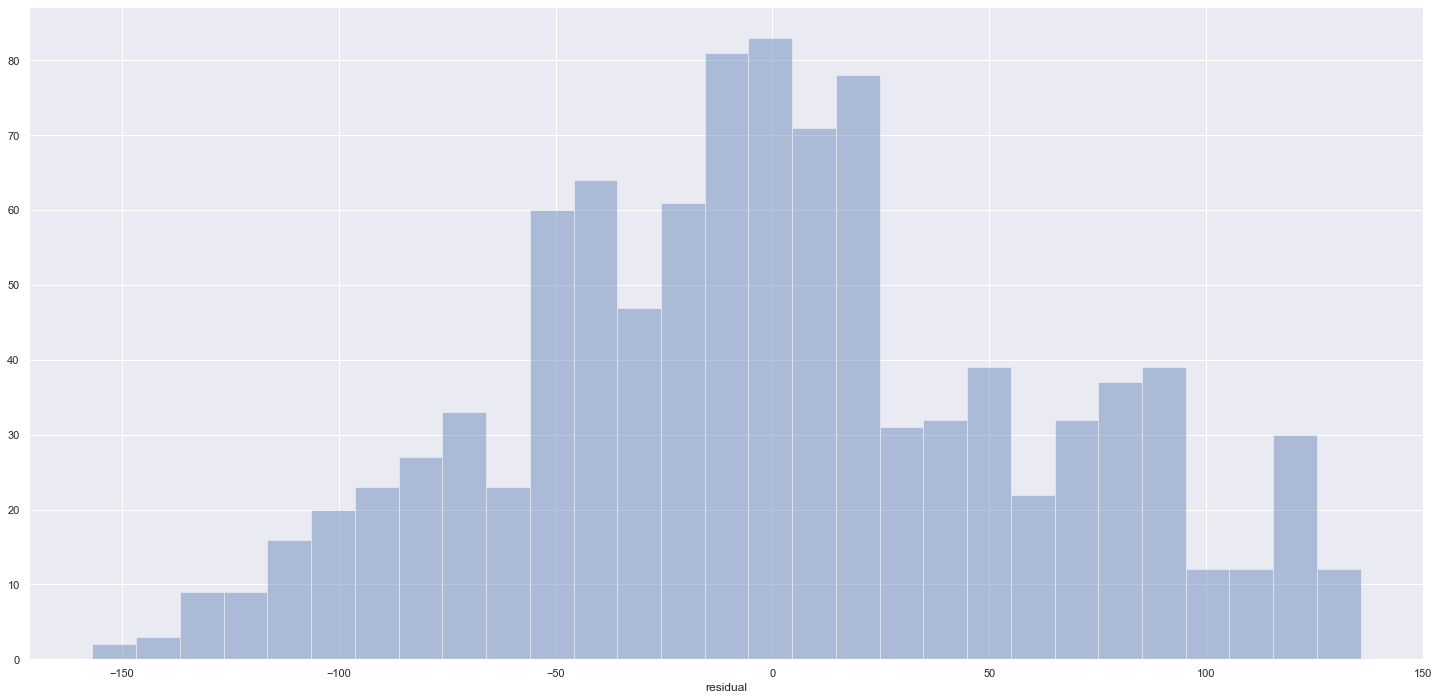

In [61]:
sns.distplot( ibm_df['residual'], kde=False, bins=29 );

In [62]:
# Optimize ARMA parameters
aicVal = []
for ari in range( 1, 3 ):
    for maj in range( 0, 3 ):
        arma_obj = smtsa.ARMA( ibm_df.Close_Price.tolist(), order=(ari, maj) ).fit( maxlag=30, method='mle', trend='nc' )
        aicVal.append( [ari, maj, arma_obj.aic] )

In [65]:
pd.DataFrame( aicVal, columns=['AR', 'MA', 'AIC'] )

,AR,MA,AIC
0,1,0,6702.766710
1,1,1,6704.704834
2,1,2,6706.643594
3,2,0,6704.705793
4,2,1,6705.736896
5,2,2,6707.728880


In [66]:
# Building optimized model using minimum AIC
arma_obj_fin = smtsa.ARMA( ibm_df.Close_Price.tolist(), order=(1, 1) ).fit( maxlag=30, method='mle', trend='nc' )
ibm_df['ARMA'] = arma_obj_fin.predict()

Text(0, 0.5, 'Closing price')

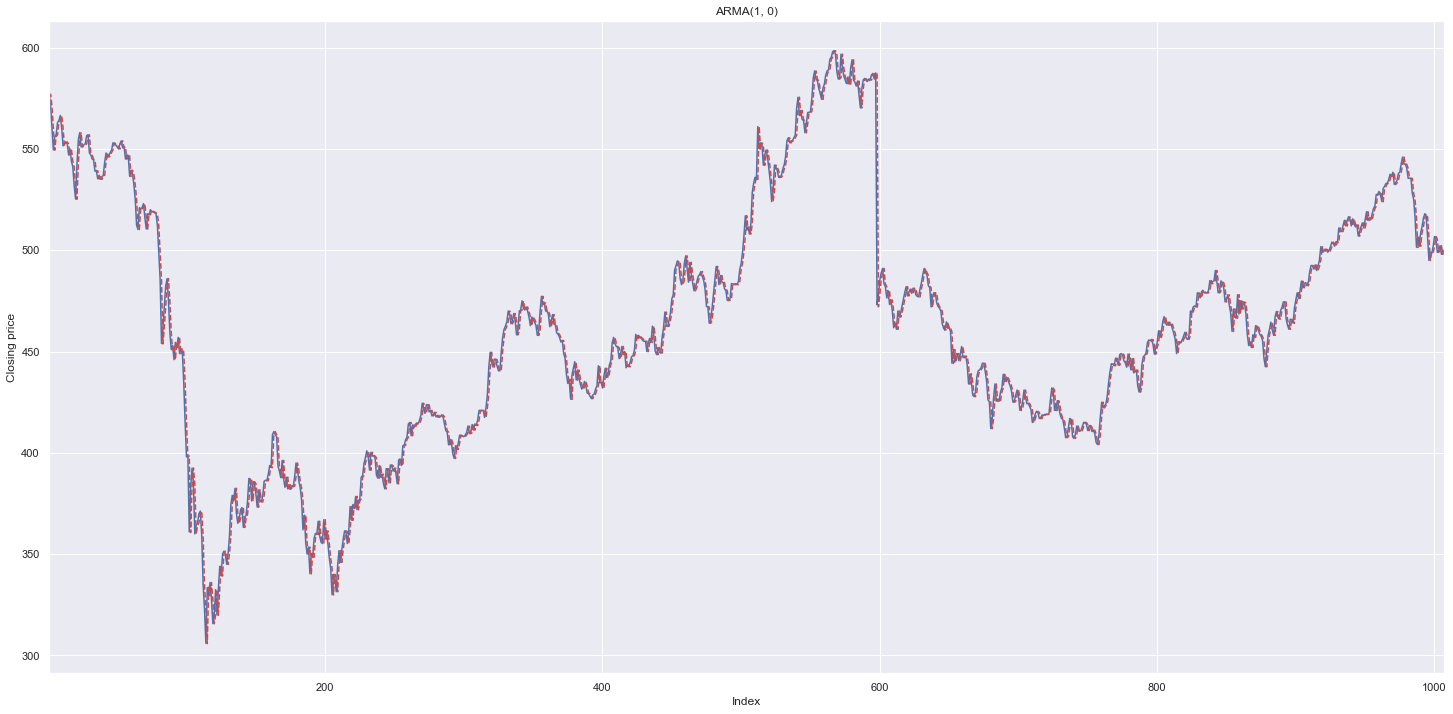

In [70]:
# Plot the curves
f, axarr = plt.subplots( 1, sharex=True )
#f.set_size_inches( 5.5, 5.5 )
ibm_df['Close_Price'].iloc[1:].plot( color='b', linestyle='-', ax=axarr )
ibm_df['ARMA'].iloc[1:].plot( color='r', linestyle='--', ax=axarr )
axarr.set_title( 'ARMA(1, 0)' )
plt.xlabel( 'Index' )
plt.ylabel( 'Closing price' )

## 4.4. ARIMA